In [1]:
import numpy as np 
import pandas as pd 
import re

import numpy as np 
import requests
from PIL import Image
from io import BytesIO 

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nietzsches-bibliography/Nietzsche_works_corpus.csv


# Importing the dataset

In [2]:
df = pd.read_csv('/kaggle/input/nietzsches-bibliography/Nietzsche_works_corpus.csv')
df.head()

,Unnamed: 0,book,text,text_clean
0,0,Beyond Good and Evil,﻿The Project Gutenberg EBook of Beyond Good an...,project gutenberg ebook beyond good evil fried...
1,1,Thus Spake Zarathustra,ï»¿The Project Gutenberg EBook of Thus Spake Z...,project gutenberg ebook thus spake zarathustra...
2,2,The Genealogy of Morals,ï»¿Project Gutenberg's The Genealogy of Morals...,project gutenberg s genealogy morals friedrich...
3,3,Ecce Homo,"ï»¿The Project Gutenberg EBook of Ecce Homo, b...",project gutenberg ebook ecce homo friedrich wi...
4,4,The Will to Power,"ï»¿Project Gutenberg's The Will to Power, Book...",project gutenberg s power book ii friedrich ni...


In [3]:
# Isolate the book wanted: Beyond Good and Evil
bge = df[df['book']=='Beyond Good and Evil']['text_clean'][0]
tokens = word_tokenize(bge)
# items to be removed
removed = {'project', 'gutenberg', 'ebook', 'it', 's', 'the', 'and'}
tokens = [ele for ele in tokens if ele not in removed]

# Word Frequency

<AxesSubplot:>

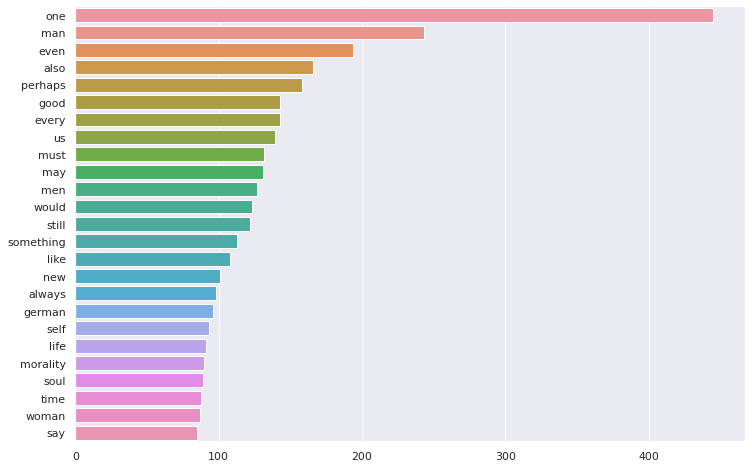

In [4]:
freq = Counter(tokens)
sorted_freq = dict(sorted(freq.items(), key=lambda x: x[1], reverse=True))
top_25_words = list(sorted_freq.keys())[:25]
top_25_freq = list(sorted_freq.values())[:25]
sns.barplot(y=top_25_words, x=top_25_freq)

# Word Cloud

## 1- Simple

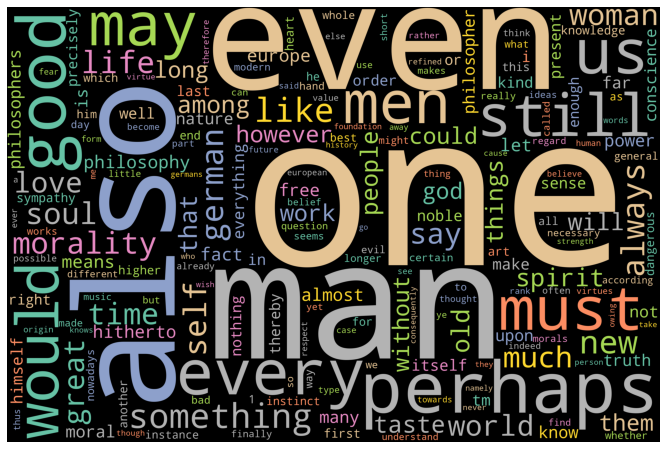

In [5]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(12, 8))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='black', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS)
wordcloud.generate_from_frequencies(sorted_freq)
plot_cloud(wordcloud)

## 2 - With a mask image of Nietzsche

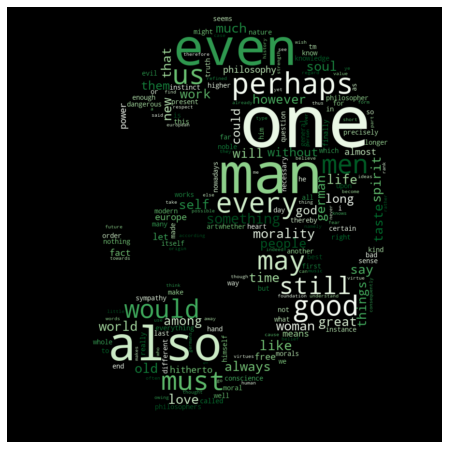

<Figure size 864x576 with 0 Axes>

In [6]:
def read_img_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img_matrix = np.array(img)
    return img_matrix

def read_txt_from_url(url, *size):
    text = requests.get(url).text
    wc = WordCloud(background_color="white", max_words=100 , max_font_size=100, width=size[0], height=size[1], random_state=42)
    wc.generate(text)
    return wc.to_array()
    
img_url = "https://nearemmaus.files.wordpress.com/2014/01/nietzsche_by_vanjamrgan.jpg"
img_matrix = read_img_from_url(img_url)

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(width = 3000, height = 2000, random_state=1, 
              background_color='black', colormap='Greens', 
              collocations=False, stopwords = STOPWORDS, mask=img_matrix)

# generate word cloud
wc.generate_from_frequencies(sorted_freq)

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()

# Stemming

In [7]:
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in tokens]
stemmed_words[100:120]

['capit',
 'e',
 'text',
 'except',
 'foreign',
 'languag',
 'phrase',
 'italic',
 'origin',
 'footnot',
 'put',
 'bracket',
 'point',
 'cite',
 'text',
 'spell',
 'alter',
 'to',
 'day',
 'to']

# Lemmatizing

In [8]:
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]
lemmatized_words[100:120]

['capitalized',
 'e',
 'text',
 'except',
 'foreign',
 'language',
 'phrase',
 'italicized',
 'original',
 'footnote',
 'put',
 'bracket',
 'point',
 'cited',
 'text',
 'spelling',
 'altered',
 'to',
 'day',
 'to']

# Tagging words in the text

In [9]:
words_tags = nltk.pos_tag(tokens)
words_tags[:20]

[('beyond', 'IN'),
 ('good', 'JJ'),
 ('evil', 'NN'),
 ('friedrich', 'NN'),
 ('nietzsche', 'NN'),
 ('use', 'NN'),
 ('anyone', 'NN'),
 ('anywhere', 'RB'),
 ('cost', 'VBZ'),
 ('almost', 'RB'),
 ('restrictions', 'NNS'),
 ('whatsoever', 'VBP'),
 ('may', 'MD'),
 ('copy', 'VB'),
 ('give', 'VB'),
 ('away', 'RP'),
 ('re', 'NN'),
 ('use', 'NN'),
 ('terms', 'NNS'),
 ('license', 'NN')]

# Dispersion Plot

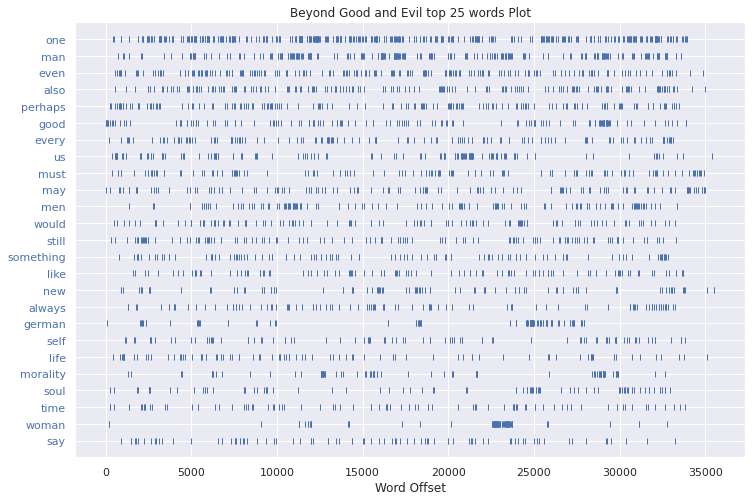

In [10]:
from nltk.draw.dispersion import dispersion_plot
from nltk.text import Text
# inaugural_tokens=inaugural.words()
text = Text(tokens)
dispersion_plot(text, top_25_words, ignore_case=True, title='Beyond Good and Evil top 25 words Plot')

# Frequency Distribution with NLTK

In [11]:
from nltk import FreqDist
from nltk.corpus import stopwords
frequency_distribution = FreqDist(tokens)
frequency_distribution.most_common(20)

[('one', 445),
 ('man', 243),
 ('even', 194),
 ('also', 166),
 ('perhaps', 158),
 ('good', 143),
 ('every', 143),
 ('us', 139),
 ('must', 132),
 ('may', 131),
 ('men', 127),
 ('would', 123),
 ('still', 122),
 ('something', 113),
 ('like', 108),
 ('new', 101),
 ('always', 98),
 ('german', 96),
 ('self', 93),
 ('life', 91)]

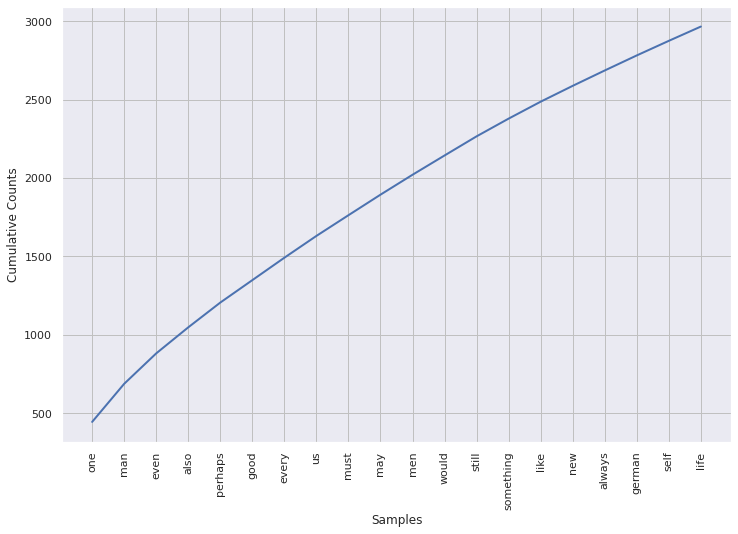

In [12]:
frequency_distribution.plot(20, cumulative=True)